In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pickle
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

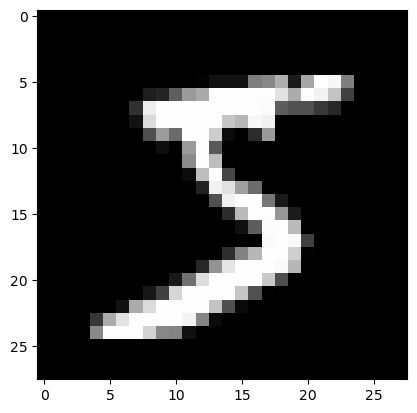

In [6]:
plt.imshow(X_train[0],cmap = 'gray')

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,input_shape=(784,),activation='relu',name = 'hidden_layer'))
model.add(Dense(10,activation='softmax',name = 'output_layer'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2874 - accuracy: 0.9171 - val_loss: 0.1617 - val_accuracy: 0.9536
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1291 - accuracy: 0.9614 - val_loss: 0.1089 - val_accuracy: 0.9689
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0965 - val_accuracy: 0.9712
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0654 - accuracy: 0.9802 - val_loss: 0.0984 - val_accuracy: 0.9684
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0898 - val_accuracy: 0.9734
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0891 - val_accuracy:

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_prob

array([[1.5875028e-06, 1.1487017e-09, 1.1581170e-06, ..., 9.9995744e-01,
        7.9862382e-08, 5.8352002e-06],
       [1.8458024e-09, 9.5926147e-08, 9.9999976e-01, ..., 5.3034248e-17,
        4.7613105e-09, 5.1662631e-17],
       [3.4516894e-08, 9.9989235e-01, 9.2036635e-06, ..., 5.4406872e-05,
        3.6773596e-05, 4.3103343e-10],
       ...,
       [1.8859305e-15, 1.9506445e-12, 1.0024050e-15, ..., 2.2425166e-08,
        2.5322486e-09, 1.2563595e-05],
       [1.1796143e-15, 7.6198864e-15, 5.1298313e-18, ..., 5.6559905e-15,
        3.1337694e-07, 8.5304815e-15],
       [1.2043718e-09, 1.6534009e-15, 4.6465843e-12, ..., 3.8294309e-15,
        1.6681775e-12, 1.1477879e-15]], dtype=float32)

In [17]:
y_pred = y_prob.argmax(axis = 1)

In [18]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
# y_pred = model.predict(X_test[0].reshape(1,28*28)).argmax(axis = 1)

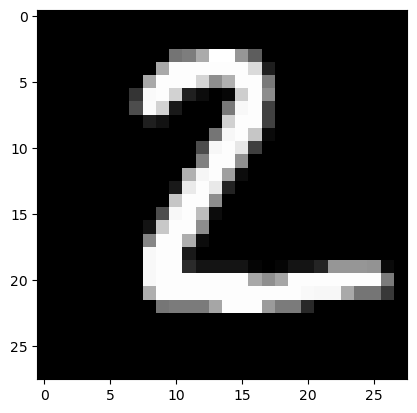

In [20]:
plt.imshow(X_test[1].reshape(28,28),cmap = 'gray')

In [21]:
y_pred[1]

2

In [22]:
loss, accuracy = model.evaluate(X_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9929


In [23]:
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Loss: {loss:.3f}")

Accuracy: 99.293
Loss: 0.027


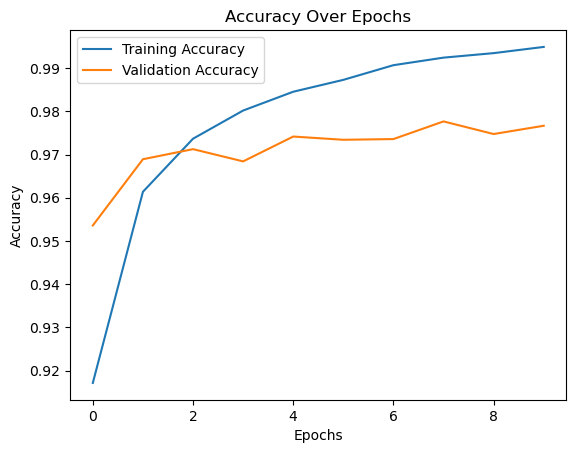

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

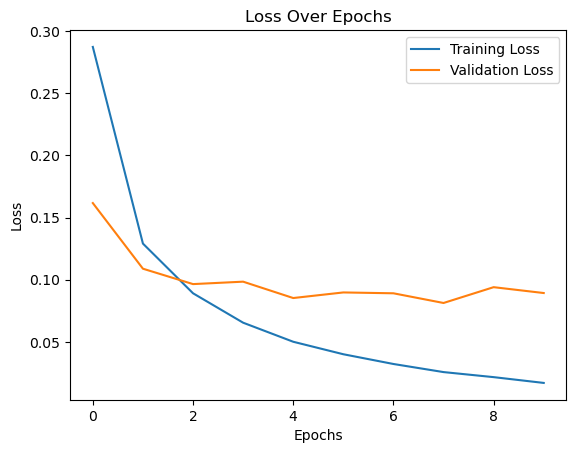

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training Loss', 'Validation Loss'])
plt.show()